In [1]:
import numpy as np
import pandas as pd

In [2]:
# load iris dataset
#load Iris dataset

df=pd.read_csv('D:\\ML & Python\\BTECH-DS-ML-Domain\\Domain class\\Course-1 ML using python\\ML Dataset\\datasets_19_420_Iris.csv')


# EDA (Exploratory Data Analysis)

In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
print(df.shape)

(150, 6)


In [5]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
#Identifying the Feature vector and Dependent varibales
x=df.drop(['Id','Species'], axis=1)

y=df['Species']

In [7]:
#Label Endcoing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [8]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


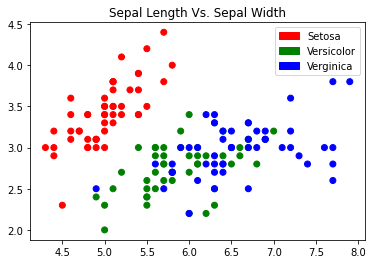

In [12]:
#plot Scatter  graph

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#plt.figure(figsize=(12,3))

colors=np.array(['red','green','blue'])

red_patch=mpatches.Patch(color='red', label='Setosa')
green_patch=mpatches.Patch(color='green', label='Versicolor')
blue_patch=mpatches.Patch(color='blue', label='Verginica')

plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[y])
plt.title('Sepal Length Vs. Sepal Width')
plt.legend(handles=[red_patch,green_patch,blue_patch])

# Implementation of KMeans Clustering

In [14]:
from sklearn.cluster import KMeans

#create a KMeans model
KMeans_model= KMeans(n_clusters=3)

#Implement or fit the model
KMeans_model.fit(x)

KMeans(n_clusters=3)

In [15]:
print(KMeans_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [16]:
print(KMeans_model.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


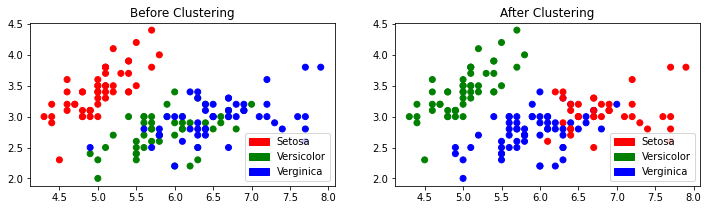

In [19]:
plt.figure(figsize=(12,3))

colors=np.array(['red','green','blue'])

predictedY=np.choose(KMeans_model.labels_, [1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[y])
plt.title('Before Clustering')
plt.legend(handles=[red_patch,green_patch,blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[predictedY])
plt.title('After Clustering')
plt.legend(handles=[red_patch,green_patch,blue_patch])

In [22]:
#accuracy and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kmeans_accu=accuracy_score(KMeans_model.labels_,y)
print("Accuracy=", kmeans_accu)

kmeans_cm=confusion_matrix(KMeans_model.labels_,y)
print(kmeans_cm)

cr=classification_report(KMeans_model.labels_,y)
print(cr)

Accuracy= 0.44
[[50  0  0]
 [ 0  2 36]
 [ 0 48 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.04      0.05      0.05        38
           2       0.28      0.23      0.25        62

    accuracy                           0.44       150
   macro avg       0.44      0.43      0.43       150
weighted avg       0.46      0.44      0.45       150

